reference 
1. brooks
2. http://whiskyanalysis.com/index.php/methodology-introduction/methodology-flavour-comparison/
3. https://www.mathstat.strath.ac.uk/outreach/nessie/nessie_whisky.html- 

assuming all these characteristics are positives. if a negative, then 0 and 5 scale should be reversed. how data is compiled? the rating associated with each distillery is for their flagship release. doesn't capture the full range of products released by a distillery. read about rating at 2 above

define what it is for an instance of something to be "best". hegel - whisky and philosophy

two characteristics: 1) complex (count), 2) balance (mean/std). how to combine these two to get an unique ranking?

use experts to describe characteristics of whisky but not determine rank. we are interested in a rating/ranking scheme, not a classification one.

have characteristics concerning smell and taste, missing others? like visual ones?

enjoying/preferring a scotch is not the same as it being the best/ideal

this rating scheme has a big negative. it doesn't require any tasting on my part.

In [15]:
%matplotlib inline
import pandas as pd

In [2]:
file_name = 'whiskies.txt'

In [3]:
data = pd.read_csv(file_name)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 17 columns):
RowID         86 non-null int64
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
 Latitude     86 non-null int64
 Longitude    86 non-null int64
dtypes: int64(15), object(2)
memory usage: 12.1+ KB


In [4]:
data.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


the rating system is mean divided by standard of score across category

In [5]:
flavors = data.loc[:, 'Distillery':'Floral']
flavors = flavors.set_index('Distillery')
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Distillery,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


In [6]:
flavors['Mean'] = flavors.mean(axis=1)
flavors['Std'] = flavors.std(axis=1)
flavors['Score'] = flavors['Mean']/flavors['Std']

In [7]:
by_score = flavors.sort_values(by='Score', ascending=False)
by_mean = flavors.sort_values(by='Mean', ascending=False)
by_std = flavors.sort_values(by='Std', ascending=False)

In [8]:
by_score

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Mean,Std,Score
Distillery,,,,,,,,,,,,,,,
Bruichladdich,1,1,2,2,0,2,2,1,2,2,2,2,1.583333,0.640095,2.473589
OldPulteney,2,1,2,2,1,0,1,1,2,2,2,2,1.500000,0.645497,2.323790
Scapa,2,2,1,1,0,2,1,1,2,2,2,2,1.500000,0.645497,2.323790
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,1.583333,0.759203,2.085521
BlairAthol,2,2,2,0,0,1,2,2,2,2,2,2,1.583333,0.759203,2.085521
Benromach,2,2,2,0,0,2,2,1,2,2,2,2,1.583333,0.759203,2.085521
Bowmore,2,2,3,1,0,2,2,1,1,1,1,2,1.500000,0.763763,1.963961
OldFettercairn,1,2,2,0,1,2,2,1,2,3,1,1,1.500000,0.763763,1.963961
Dalmore,3,2,2,1,0,1,2,2,1,2,3,1,1.666667,0.849837,1.961161


In [33]:
df.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Mean,Std,Score
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,1.410853,0.947881,1.527533
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,0.254306,0.194544,0.329456
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.577350,0.883541
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.250000,0.806768,1.299867
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.375000,0.924211,1.485297
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.583333,1.040833,1.758838
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.166667,1.554563,2.473589


show by_mean, by_score, then by_score_count?

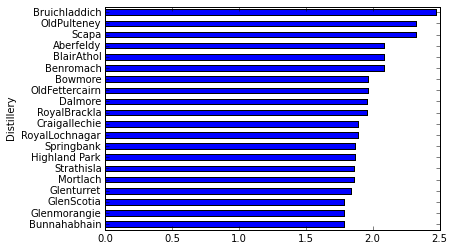

In [21]:
by_score['Score'].head(20).sort_values().plot(kind='barh')

top ranked scotches mapped. are the top scotches confined to a specific geographic region?

if ranking is not indicative of highest quality scotches, why might that be? essential component of flavor or something else missing? flavor classification is not? advertisment, quality is responsible for notierity of certain brands. our definition of "best" differs from how most judge whisky. for example, the smoky islay scotches won't be at the top of the list due to their extreme flavor profile, though interestingly the top ranked scotch is from islay, just not one of the smoky guys. notice this rating system is all about balance.